In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None


In [3]:

# Read the dataset
df = pd.read_csv("../Data_Lab/cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## EDA

### Number of cases with cardiovascular dissease (Positive / Negative)

In [5]:
# Number of positive and negative cases

positive_cases = df[df['cardio'] == 1].shape[0]
negative_cases = df[df['cardio'] == 0].shape[0] 
# shape[0] to count the number of rows

print(f"Positive cases: {positive_cases}")
print(f"Negative cases: {negative_cases}")

Positive cases: 34979
Negative cases: 35021


### Cholesterol Levels

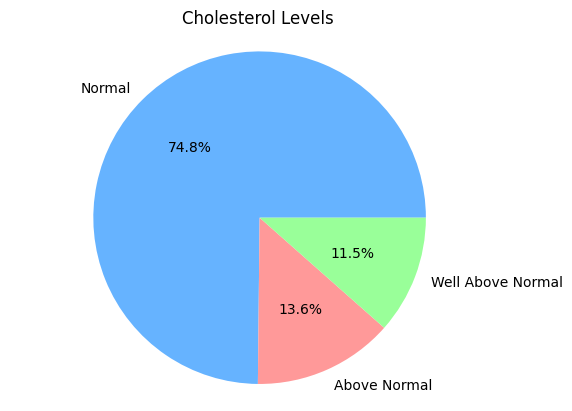

In [6]:
# Percentage of each cholesterol level
cholesterol_counts = df['cholesterol'].value_counts(normalize=True) * 100

# Pie chart
labels = ['Normal', 'Above Normal', 'Well Above Normal']
colors = ['#66b3ff', '#ff9999', '#99ff99']
plt.pie(cholesterol_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Cholesterol Levels')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Display the chart
plt.show()

### Age Distribution

- I will convert from days to years.

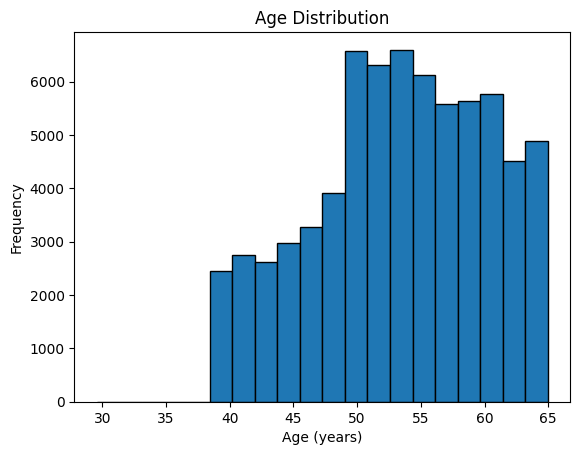

In [7]:
# Converts age from days to years
df['age_years'] = df['age'] / 365

# Histogram
plt.hist(df['age_years'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Display the chart
plt.show()

### Percentage of smokers

In [8]:
# Calculate the percentage of smokers
smoker_counts = df['smoke'].value_counts(normalize=True) * 100
percentage_smokers = smoker_counts[1]

print(f"Percentage of smokers: {percentage_smokers:.2f}%")

Percentage of smokers: 8.81%


### Weight and Height Distribution

- Here we notice some outliers.

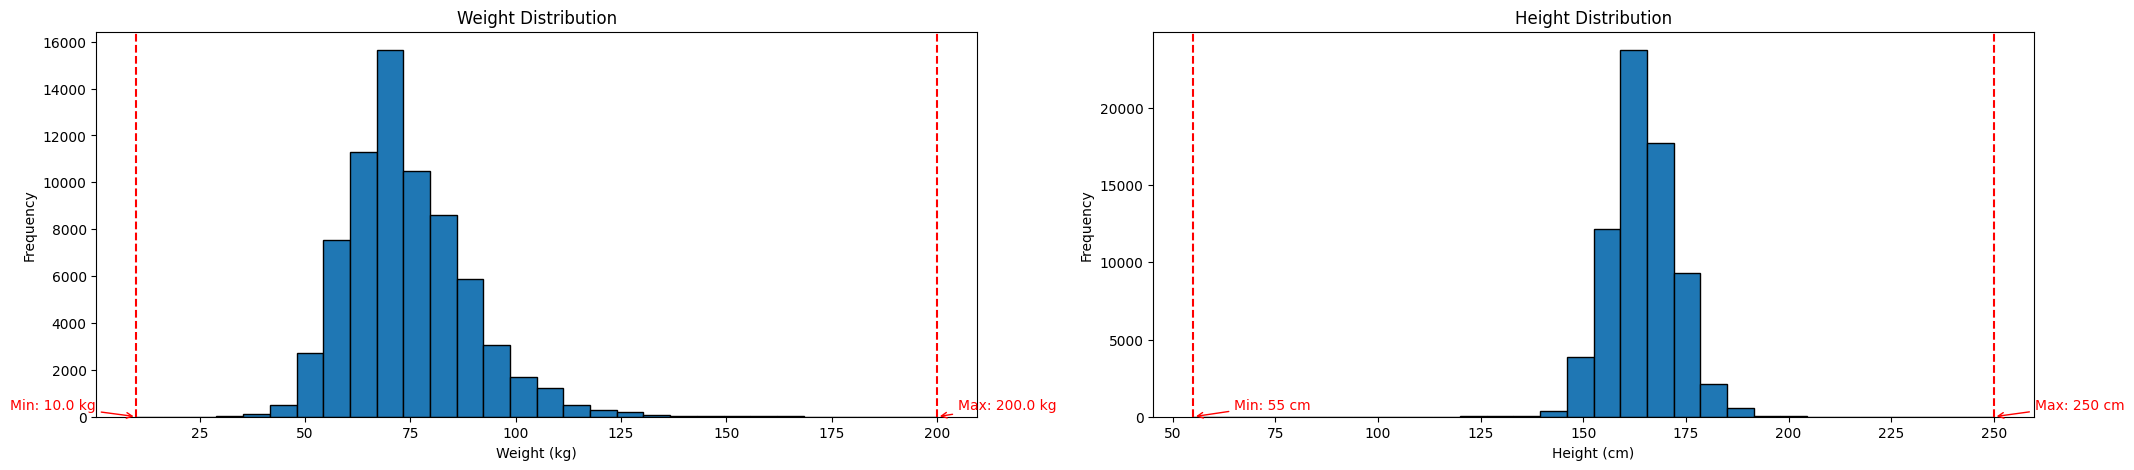

In [9]:
# Subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))


# -----------------------------------------
# Weight distribution Plot
ax1.hist(df['weight'], bins=30, edgecolor='black')
ax1.set_title('Weight Distribution')
ax1.set_xlabel('Weight (kg)')
ax1.set_ylabel('Frequency')

# Vertical lines and annotations for weight min and max
weight_min = df['weight'].min()
weight_max = df['weight'].max()
ax1.axvline(weight_min, color='red', linestyle='--')
ax1.axvline(weight_max, color='red', linestyle='--')
ax1.annotate(f'Min: {weight_min} kg', xy=(weight_min, 0), xytext=(weight_min-30, 300), color='red', arrowprops=dict(arrowstyle='->', color='red'))
ax1.annotate(f'Max: {weight_max} kg', xy=(weight_max, 0), xytext=(weight_max+5, 300), color='red', arrowprops=dict(arrowstyle='->', color='red'))



# -----------------------------------------
# Height distribution Plot
ax2.hist(df['height'], bins=30, edgecolor='black')
ax2.set_title('Height Distribution')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Frequency')


# Vertical lines and annotations for height min and max
height_min = df['height'].min()
height_max = df['height'].max()
ax2.axvline(height_min, color='red', linestyle='--')
ax2.axvline(height_max, color='red', linestyle='--')
ax2.annotate(f'Min: {height_min} cm', xy=(height_min, 0), xytext=(height_min+10, 500), color='red', arrowprops=dict(arrowstyle='->', color='red'))
ax2.annotate(f'Max: {height_max} cm', xy=(height_max, 0), xytext=(height_max+10, 500), color='red', arrowprops=dict(arrowstyle='->', color='red'))


plt.show()

## Feature Engineering BMI
- A feature for Body Mass Index
- Remove outliers
- Create categorical BMI-feature with: normal range, overweight, obese (class 1), obese (class 2) and obese (class 3)

I will create a new column for body mass index called BMI and vizualize the outliers

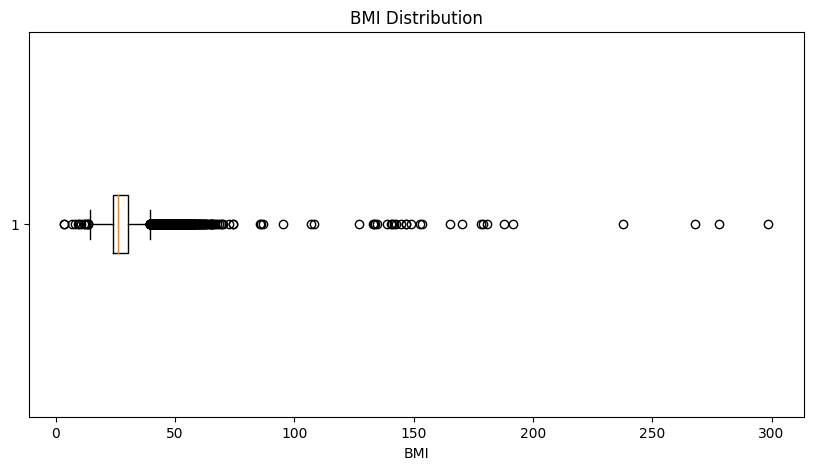

In [10]:
# Calculate BMI
df['BMI'] = df['weight'] / (df['height'] / 100)**2

# Create a box plot
plt.figure(figsize=(10, 5))
plt.boxplot(df['BMI'], vert=False)
plt.title('BMI Distribution')
plt.xlabel('BMI')

# Display the chart
plt.show()

In [11]:
# function to calculate outliers using quantiles

def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers

# Calculate the outliers for systolic BMI 
bmi_outliers = calculate_outliers(df['BMI'])



# Print the number of outliers for each feature
print(f"Number of body mass index (BMI) outliers: {len(bmi_outliers)}")


Number of body mass index (BMI) outliers: 1995


We have some extreme outliers. According to wikipedia, these are the ranges of interest:

- Underweight (Severe thinness)	< 16.0
- Underweight (Moderate thinness)	16.0 – 16.9	
- Underweight (Mild thinness)	17.0 – 18.4	
- Normal range	18.5 – 24.9	
- Overweight (Pre-obese)	25.0 – 29.9	
- Obese (Class I)	30.0 – 34.9	
- Obese (Class II)	35.0 – 39.9	
- Obese (Class III)	≥ 40.0	

In [12]:
# Amount with BMI >= 40
above_40_count = (df['BMI'] >= 40).sum()

# Count the number of rows with BMI < 18.5
below_18_5_count = (df['BMI'] < 18.5).sum()

total_bmi = df['BMI'].count()

print(f"Number of rows with BMI < 18.5: {below_18_5_count}")
print(f"Number of rows with BMI >= 40: {above_40_count}")
print(f"Total: {total_bmi}")

Number of rows with BMI < 18.5: 650
Number of rows with BMI >= 40: 1886
Total: 70000


In [13]:
total_rows = 70000

# Calculate the percentages
below_18_5_percentage = (below_18_5_count / total_rows) * 100
above_40_percentage = (above_40_count / total_rows) * 100

print(f"Percentage of rows with BMI < 18.5: {below_18_5_percentage:.2f}%")
print(f"Percentage of rows with BMI >= 40: {above_40_percentage:.2f}%")

Percentage of rows with BMI < 18.5: 0.93%
Percentage of rows with BMI >= 40: 2.69%


The percentage below the normal range and above obese class 3 is below 4% so I will discard those values. It is a small amount and should be ok to remove.

In [14]:
# Filter the dataset based on BMI ranges of interest
filtered_data = df[
    (df['BMI'] >= 18.5) &
    (df['BMI'] <= 40.0)
]

# Calculate the number of rows removed
removed_rows = len(df) - len(filtered_data)

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(filtered_data)}")
print(f"Removed {removed_rows} rows due to BMI outliers")

Original dataset size: 70000
Filtered dataset size: 67478
Removed 2522 rows due to BMI outliers


Double check to see if it is still close to 50% ( Positive / Negative ) disease. 

In [15]:
# Number of positive and negative cases

positive_cases_filtered = filtered_data[filtered_data['cardio'] == 1].shape[0]
negative_cases_filtered = filtered_data[filtered_data['cardio'] == 0].shape[0] 

print(f"Positive cases filtered data: {positive_cases_filtered}")
print(f"Negative cases filtered data: {negative_cases_filtered}")

Positive cases filtered data: 33508
Negative cases filtered data: 33970


### Create categorical features for:
- Normal range
- Overweight
- Obese (class I) 
- Obese (class II)
- Obese (class III)

In [16]:
# Categorical feature  by using pd.cut. Segment and sort data values into bins
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html

# Define the categories and their corresponding BMI ranges
bmi_categories = ['Normal range', 'Overweight (Pre-obese)', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)']
bmi_ranges = [18.5, 24.9, 29.9, 34.9, 39.9, filtered_data['BMI'].max()]

# Categorical BMI feature using pd.cut()
filtered_data['BMI_category'] = pd.cut(filtered_data['BMI'], bins=bmi_ranges, labels=bmi_categories, include_lowest=True)

# Check
filtered_data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Obese (Class II)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Normal range


## Feature Engineering Blood Pressure
- A feature for Blood Pressure
- Remove outliers
- Create categorical Blood Pressure feature with: healthy, elevated, hypertension(I), hypertension(II) and hypertensive crisis.

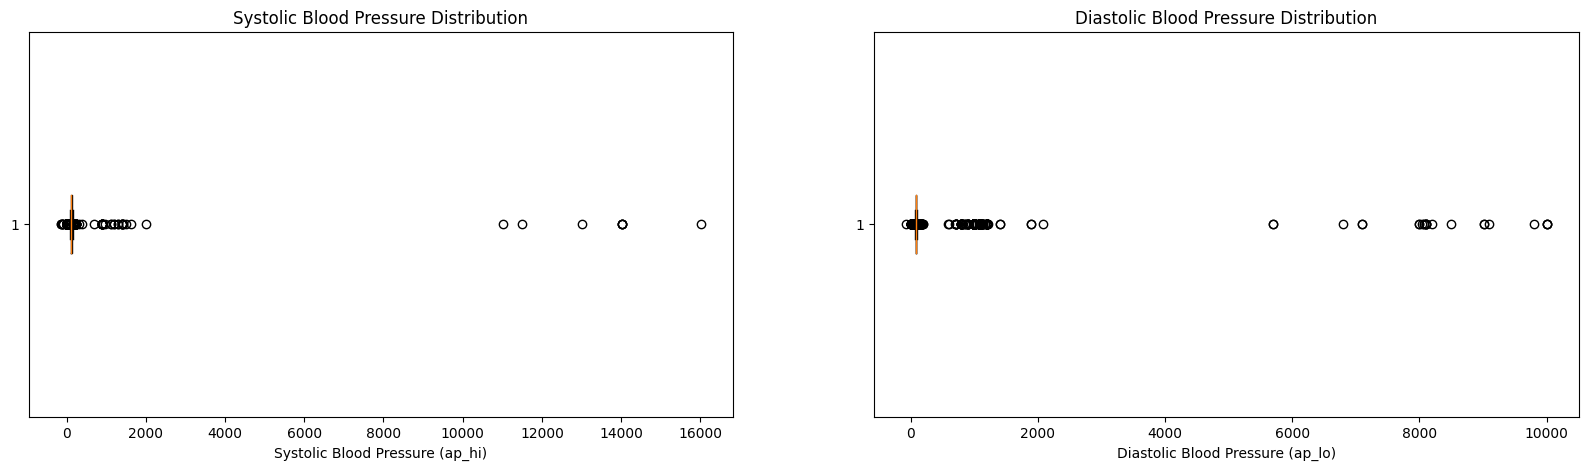

In [17]:

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Create a box plot for systolic blood pressure (ap_hi)
ax[0].boxplot(filtered_data['ap_hi'], vert=False)
ax[0].set_title('Systolic Blood Pressure Distribution')
ax[0].set_xlabel('Systolic Blood Pressure (ap_hi)')

# Create a box plot for diastolic blood pressure (ap_lo)
ax[1].boxplot(filtered_data['ap_lo'], vert=False)
ax[1].set_title('Diastolic Blood Pressure Distribution')
ax[1].set_xlabel('Diastolic Blood Pressure (ap_lo)')

# Display the charts
plt.show()

Some extreme outliers.

In [18]:
def calculate_outliers_and_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Calculate the outliers and bounds for systolic blood pressure (ap_hi)
systolic_outliers, systolic_lower_bound, systolic_upper_bound = calculate_outliers_and_bounds(filtered_data['ap_hi'])

# Calculate the outliers and bounds for diastolic blood pressure (ap_lo)
diastolic_outliers, diastolic_lower_bound, diastolic_upper_bound = calculate_outliers_and_bounds(filtered_data['ap_lo'])

# Print the number of outliers and the outlier ranges for each feature
print(f"Number of systolic blood pressure (ap_hi) outliers: {len(systolic_outliers)}")
print(f"Systolic blood pressure (ap_hi) outlier range: < {systolic_lower_bound} or > {systolic_upper_bound}")
print(f"Number of diastolic blood pressure (ap_lo) outliers: {len(diastolic_outliers)}")
print(f"Diastolic blood pressure (ap_lo) outlier range: < {diastolic_lower_bound} or > {diastolic_upper_bound}")

Number of systolic blood pressure (ap_hi) outliers: 1317
Systolic blood pressure (ap_hi) outlier range: < 90.0 or > 170.0
Number of diastolic blood pressure (ap_lo) outliers: 4352
Diastolic blood pressure (ap_lo) outlier range: < 65.0 or > 105.0


Using quantiles removes to much data, also it removes to much valuable data. Like with BMI, I will set a specific range

In [19]:
# Count the number of rows with systolic blood pressure above 180
systolic_above_180 = len(filtered_data[filtered_data['ap_hi']  > 180])

# Count the number of rows with diastolic blood pressure over 120
diastolic_above_120 = len(filtered_data[filtered_data['ap_lo'] > 120])

# Print the counts
print(f"Number of rows with systolic blood pressure above 180: {systolic_above_180}")
print(f"Number of rows with diastolic blood pressure over 120: {diastolic_above_120}")


Number of rows with systolic blood pressure above 180: 330
Number of rows with diastolic blood pressure over 120: 981


That is a lot more acceptable. I will increase the systolic to 250 and diastolic to 150 for good measure to acount for all categories.

In [20]:
# Filter the dataset to keep only rows with systolic blood pressure between 0 and 250
filtered_systolic = (filtered_data['ap_hi'] >= 0) & (filtered_data['ap_hi'] <= 250)

# Filter the dataset to keep only rows with diastolic blood pressure between 0 and 150
filtered_diastolic = (filtered_data['ap_lo'] >= 0) & (filtered_data['ap_lo'] <= 150)

# Create a new dataset with the desired blood pressure ranges
filtered_bp_data = filtered_data[filtered_systolic & filtered_diastolic]

# Display the sizes of the filtered_data and filtered_bp_data datasets
print(f"Filtered data size (before blood pressure filtering): {len(filtered_data)}")
print(f"Filtered data size (after blood pressure filtering): {len(filtered_bp_data)}")


Filtered data size (before blood pressure filtering): 67478
Filtered data size (after blood pressure filtering): 66525


In [21]:


def blood_pressure_category(row):
    systolic = row['ap_hi']
    diastolic = row['ap_lo']

    if systolic < 120 and diastolic < 80:
        return 'Healthy'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 'Elevated'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return 'Stage 1 hypertension'
    elif systolic >= 140 or diastolic >= 90:
        return 'Stage 2 hypertension'
    elif systolic > 180 or diastolic > 120:
        return 'Hypertension crisis'
    else:
        return 'Undefined'

# Apply the blood_pressure_category function to each row in the filtered dataset
filtered_bp_data['bp_category'] = filtered_bp_data.apply(blood_pressure_category, axis=1)

new_df = filtered_bp_data.copy()

# Display the first few rows of the dataset with the new 'bp_category' feature
new_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Normal range,Stage 1 hypertension
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Obese (Class II),Stage 2 hypertension
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Normal range,Stage 1 hypertension
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,Overweight (Pre-obese),Stage 2 hypertension
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,Normal range,Healthy


## Visualizations

Skapa barplots med en feature mot andelen positiva för hjärt-kärl sjukdom. Exempelvis blodtryckskategorier
mot andel positiva, BMI kategori mot andel positiva mm. Gör dessa plots i en figur med flera subplots.


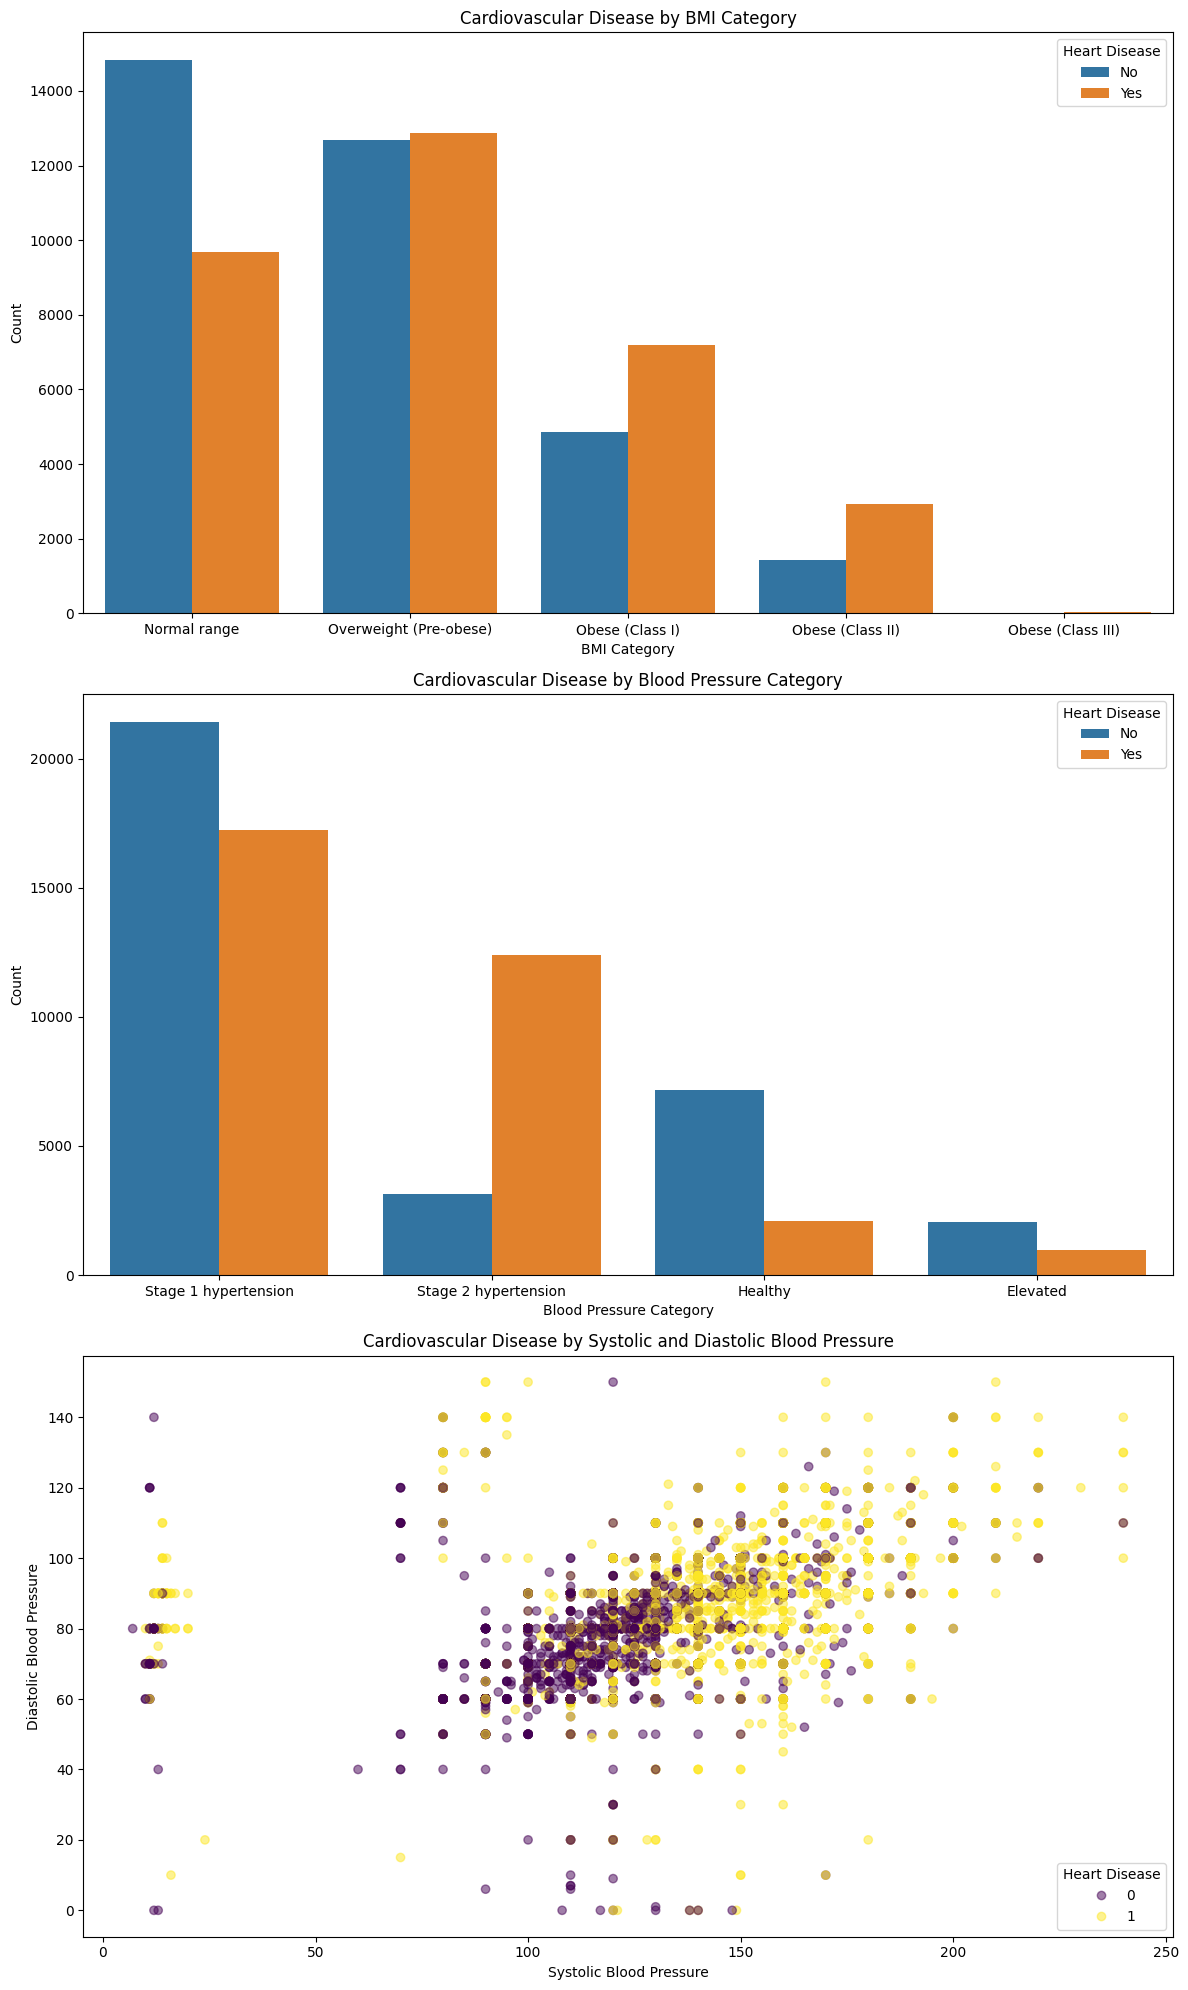

In [45]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))

# Countplot for BMI_category vs cardio
sns.countplot(ax=axes[0], x='BMI_category', hue='cardio', data=new_df)
axes[0].set(title='Cardiovascular Disease by BMI Category', xlabel='BMI Category', ylabel='Count')
axes[0].legend(title='Heart Disease', labels=['No', 'Yes'])

# Countplot for bp_category vs cardio
sns.countplot(ax=axes[1], x='bp_category', hue='cardio', data=new_df)
axes[1].set(title='Cardiovascular Disease by Blood Pressure Category', xlabel='Blood Pressure Category', ylabel='Count')
axes[1].legend(title='Heart Disease', labels=['No', 'Yes'])

# Scatterplot for ap_hi vs ap_lo, colored by cardio
scatter = axes[2].scatter(x=new_df['ap_hi'], y=new_df['ap_lo'], c=new_df['cardio'], alpha=0.5)
axes[2].set(title='Cardiovascular Disease by Systolic and Diastolic Blood Pressure', xlabel='Systolic Blood Pressure', ylabel='Diastolic Blood Pressure')

# Add a legend to the scatterplot
axes[2].legend(*scatter.legend_elements(), title='Heart Disease')

fig.tight_layout()
plt.show()


### Correlation Matrix

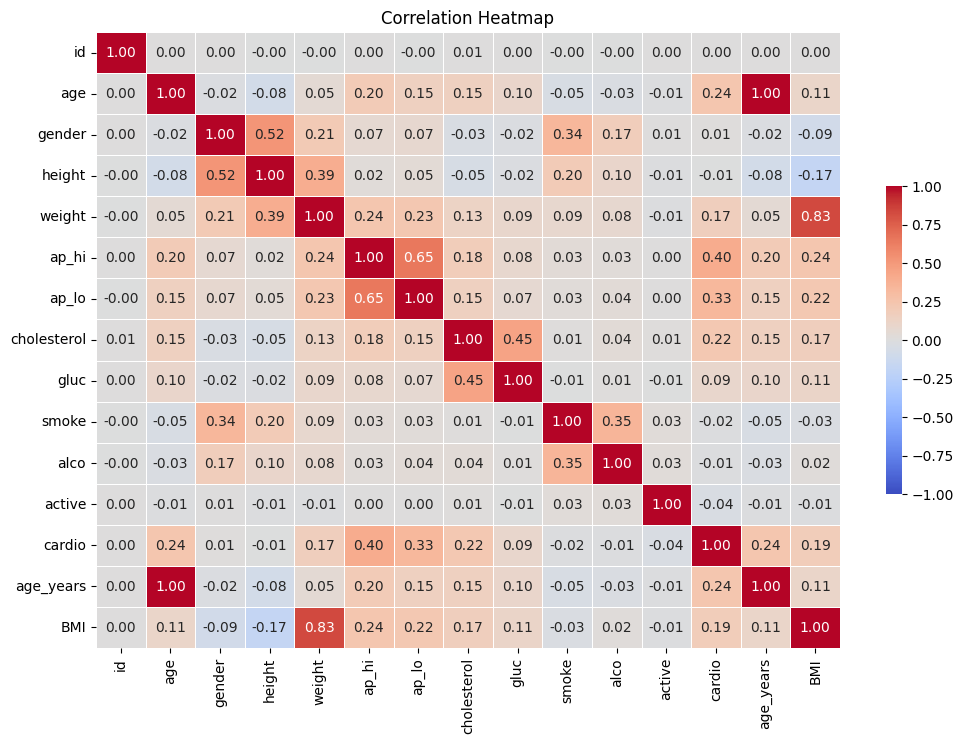

In [46]:

# Calculate the correlation matrix
corr_matrix = new_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title for the heatmap
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()


Features that affect each other are represented between -1 and 1. 0 Being neutral. The stronger they effect each other the higher the number. (redness)

We can look at many different angles but lets look correlation with heart disease (cardio) since that interest us the most.

&nbsp;
- Blood pressure: (api hi/lo)

Systolic and diastolic blood pressure are closely related and both are strong indicators of cardiovascular disease.

&nbsp;

- Age: 

As age increases, the risk of cardiovascular disease and the values of blood pressure and cholesterol tend to increase.<br>

&nbsp;

- Cholesterol:

Higher cholesterol levels are associated with higher blood pressure, glucose levels, and cardiovascular disease risk.

&nbsp;

- BMI: 0.19

This suggests that higher BMI values are associated with higher weight, blood pressure, and cardiovascular disease risk.

&nbsp;

The remaining variables, such as gender, smoke, alco, and active, show weak or very weak correlations with most of the other variables in the dataset.



---------------------------
## Data Prep